In [1]:
import numpy as np
import tensorflow as tf
tf.random.set_seed(55)
import matplotlib.pyplot as plt

In [2]:
mnist = tf.keras.datasets.mnist

# 0. Data preprocessing
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0


print("x_train shape: {} | x_test_shpae: {}".format(x_train.shape, x_test.shape))

x_train shape: (60000, 28, 28) | x_test_shpae: (10000, 28, 28)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 44us/sample - loss: 1.0870 - accuracy: 0.7627
Epoch 2/10
60000/60000 [==============================] - 3s 44us/sample - loss: 0.5183 - accuracy: 0.8741
Epoch 3/10
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4177 - accuracy: 0.8915
Epoch 4/10
60000/60000 [==============================] - 2s 36us/sample - loss: 0.3713 - accuracy: 0.8999
Epoch 5/10
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3425 - accuracy: 0.9066
Epoch 6/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.3222 - accuracy: 0.9112
Epoch 7/10
60000/60000 [==============================] - 3s 45us/sample - loss: 0.3063 - accuracy: 0.9152
Epoch 8/10
60000/60000 [==============================] - 2s 34us/sample - loss: 0.2932 - accuracy: 0.9184
Epoch 9/10
60000/60000 [==============================] - 4s 63us/sample - loss: 0.2819 - accuracy: 0.9219
Epoch 10/10
60

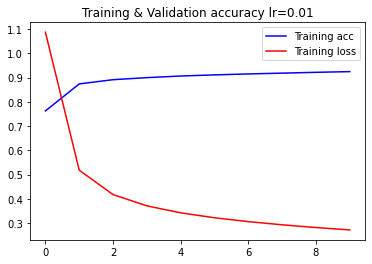

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [3]:
# Model1 : (base)sparse_categorical_crossentropy

# 1. Model Design
model1 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 2. Model Compile
model1.compile(optimizer=optimizer, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history1 = model1.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc1 = history1.history['accuracy']
loss1 = history1.history['loss']
epochs1 = range(len(acc1))

plt.plot(epochs1, acc1, 'b', label='Training acc')
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.01')
plt.legend()
plt.show()

# 4. Model evaluation
eval1_train=model1.evaluate(x_train, y_train)
eval1_test=model1.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 70us/sample - loss: 6.7757 - accuracy: 0.7595
Epoch 2/10
60000/60000 [==============================] - 4s 62us/sample - loss: 5.2864 - accuracy: 0.8709
Epoch 3/10
60000/60000 [==============================] - 4s 62us/sample - loss: 4.4072 - accuracy: 0.8872
Epoch 4/10
60000/60000 [==============================] - 4s 64us/sample - loss: 3.7102 - accuracy: 0.8964
Epoch 5/10
60000/60000 [==============================] - 4s 64us/sample - loss: 3.1401 - accuracy: 0.9024
Epoch 6/10
60000/60000 [==============================] - 4s 61us/sample - loss: 2.6701 - accuracy: 0.9065
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 2.2811 - accuracy: 0.9099
Epoch 8/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1.9585 - accuracy: 0.9126
Epoch 9/10
60000/60000 [==============================] - 4s 59us/sample - loss: 1.6907 - accuracy: 0.9151
Epoch 10/10
60

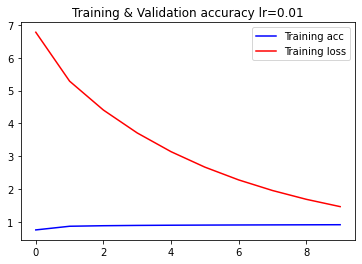

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [7]:
# Model2 : L2 regularization
# from tensorflow.keras import regularizers


# 1. Model Design
model2 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 2. Model Compile
model2.compile(optimizer=optimizer, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history2 = model2.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc2 = history2.history['accuracy']
loss2 = history2.history['loss']
epochs2 = range(len(acc2))

plt.plot(epochs2, acc2, 'b', label='Training acc')
plt.plot(epochs2, loss2, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.01')
plt.legend()
plt.show()

# 4. Model evaluation
eval2_train=model2.evaluate(x_train, y_train)
eval2_test=model2.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 89us/sample - loss: 1.1199 - accuracy: 0.7319
Epoch 2/10
60000/60000 [==============================] - 5s 80us/sample - loss: 0.5530 - accuracy: 0.8586
Epoch 3/10
60000/60000 [==============================] - 5s 90us/sample - loss: 0.4471 - accuracy: 0.8794
Epoch 4/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.4005 - accuracy: 0.8892
Epoch 5/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3686 - accuracy: 0.8965
Epoch 6/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3477 - accuracy: 0.9027
Epoch 7/10
60000/60000 [==============================] - 5s 81us/sample - loss: 0.3309 - accuracy: 0.9071
Epoch 8/10
60000/60000 [==============================] - 5s 78us/sample - loss: 0.3165 - accuracy: 0.9104
Epoch 9/10
60000/60000 [==============================] - 5s 87us/sample - loss: 0.3039 - accuracy: 0.9143
Epoch 10/10
60

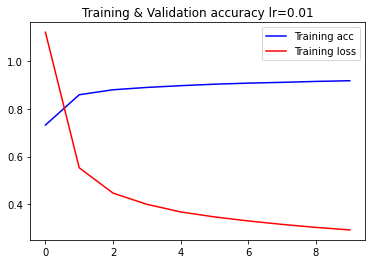

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [8]:
# Model3 : dropout
# from tensorflow.keras import regularizers


# 1. Model Design
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
  tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 2. Model Compile
model3.compile(optimizer=optimizer, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history3 = model3.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc3 = history3.history['accuracy']
loss3 = history3.history['loss']
epochs3 = range(len(acc3))

plt.plot(epochs3, acc3, 'b', label='Training acc')
plt.plot(epochs3, loss3, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.01')
plt.legend()
plt.show()

# 4. Model evaluation
eval3_train=model3.evaluate(x_train, y_train)
eval3_test=model3.evaluate(x_test, y_test)

In [16]:
from scipy import ndimage
# data_augmentation
def data_augmentation(images, labels):
    aug_images = []
    aug_labels = []
        
    for x, y in zip(images, labels):
        aug_images.append(x)
        aug_labels.append(y)
        bg_value = np.median(x)
            
        for _ in range(2):
            angle = np.random.randint(-15, 15, 1)
            rot_img = ndimage.rotate(x, angle[0], reshape=False, cval=bg_value)
                
            shift = np.random.randint(-2, 2, 2)
            shift_img = ndimage.shift(rot_img, shift, cval=bg_value)

            aug_images.append(shift_img)
            aug_labels.append(y)
                
    aug_images = np.array(aug_images)
    aug_labels = np.array(aug_labels) 
        
    return aug_images, aug_labels


In [19]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train_aug, y_train_aug = data_augmentation(x_train, y_train)


In [20]:
x_train_aug, x_test = x_train_aug / 255.0, x_test / 255.0


print("x_train_aug shape: {} | x_test_shpae: {}".format(x_train_aug.shape, x_test.shape))


x_train_aug shape: (180000, 28, 28) | x_test_shpae: (10000, 28, 28)


Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 27us/sample - loss: 100.8746 - accuracy: 0.7396
Epoch 2/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4783 - accuracy: 0.8873
Epoch 3/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3701 - accuracy: 0.9060
Epoch 4/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3193 - accuracy: 0.9162
Epoch 5/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.4271 - accuracy: 0.8924
Epoch 6/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.5026 - accuracy: 0.8923
Epoch 7/10
60000/60000 [==============================] - 1s 24us/sample - loss: 0.3882 - accuracy: 0.9080
Epoch 8/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.3080 - accuracy: 0.9210
Epoch 9/10
60000/60000 [==============================] - 1s 23us/sample - loss: 0.2949 - accuracy: 0.9231
Epoch 10/10


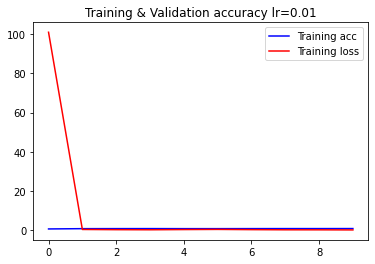

60000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [21]:
# Model4 : data augmentation

# 1. Model Design
model4 = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(), # input data transform: 1D array
  tf.keras.layers.Dense(512, activation='relu'), # set activation function
#   tf.keras.layers.Dropout(0.2), # set dropout
  tf.keras.layers.Dense(10, activation='softmax'), # set output layer

])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

# 2. Model Compile
model4.compile(optimizer=optimizer, # set optimizer 
              loss='sparse_categorical_crossentropy', # set loss function
              metrics=['accuracy'] # set metrics to monitor
              ) 
# 3. Model fit
history4 = model4.fit(x_train, y_train, epochs=10, batch_size=128) # training

acc4 = history4.history['accuracy']
loss4 = history4.history['loss']
epochs4 = range(len(acc4))

plt.plot(epochs4, acc4, 'b', label='Training acc')
plt.plot(epochs4, loss4, 'r', label='Training loss')
plt.title('Training & Validation accuracy lr=0.01')
plt.legend()
plt.show()

# 4. Model evaluation
eval4_train=model4.evaluate(x_train, y_train)
eval4_test=model4.evaluate(x_test, y_test)

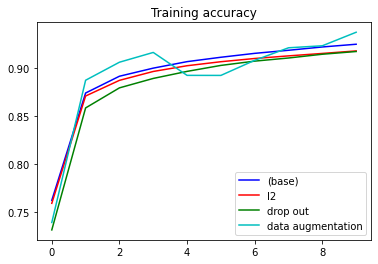

In [23]:
plt.plot(epochs1, acc1, 'b', label='(base)')
plt.plot(epochs2, acc2, 'r', label='l2')
plt.plot(epochs3, acc3, 'g', label='drop out')
plt.plot(epochs4, acc4, 'c', label='data augmentation')
plt.title('Training accuracy')
plt.legend()
plt.show()

In [25]:
import pandas as pd

data = [['(base)', eval1_train[1], eval1_test[1]],
        ['l2', eval2_train[1], eval2_test[1]],
        ['drop out', eval3_train[1], eval3_test[1]],
        ['data augmentation', eval4_train[1], eval4_test[1]]
       ]
        
df=pd.DataFrame(data, columns= ['Regularization','Training accuracy', 'Test accuracy'])

In [26]:
print(df)

      Regularization  Training accuracy  Test accuracy
0             (base)           0.926150         0.9281
1                 l2           0.919067         0.9216
2           drop out           0.925150         0.9285
3  data augmentation           0.943383         0.0981


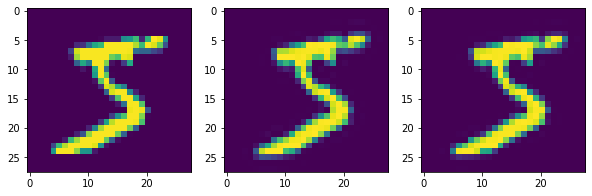

In [64]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(x_train_aug[0])
plt.subplot(1, 3, 2)
plt.imshow(x_train_aug[1])
plt.subplot(1, 3, 3)
plt.imshow(x_train_aug[2])
plt.show()

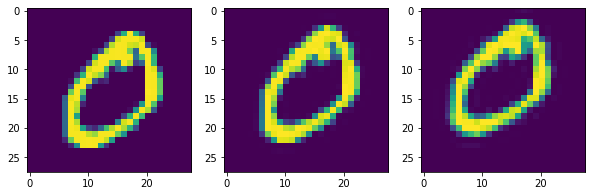

In [65]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(x_train_aug[3])
plt.subplot(1, 3, 2)
plt.imshow(x_train_aug[4])
plt.subplot(1, 3, 3)
plt.imshow(x_train_aug[5])
plt.show()

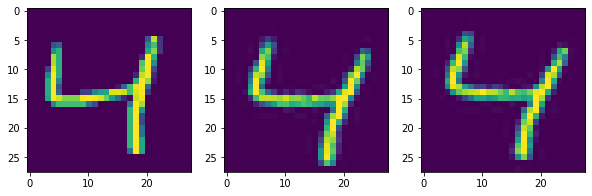

In [66]:
plt.figure(figsize=(10,10))
plt.subplot(1, 3, 1)
plt.imshow(x_train_aug[6])
plt.subplot(1, 3, 2)
plt.imshow(x_train_aug[7])
plt.subplot(1, 3, 3)
plt.imshow(x_train_aug[8])
plt.show()